## Data Analysis Process

### 1. Questions


### 2. Wrangle

In [145]:
#get data
import pandas as pd

train_df = pd.read_csv('train.csv')
train_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [158]:
#get unique values

unique_pclass   = train_df['Pclass'].unique()
unique_sex      = train_df['Sex'].unique()
unique_age      = train_df['Age'].unique()
unique_sibsp    = train_df['SibSp'].unique()
unique_parch    = train_df['Parch'].unique()
unique_embarked = train_df['Embarked'].unique()


print 'Pclass', unique_pclass
print 'Sex', unique_sex
print 'Age', unique_age
print 'SibSp', unique_sibsp
print 'Parch', unique_parch
print 'Embarked', unique_embarked


#clean

train_df.drop(['PassengerId','Ticket'], axis=1)
train_df.Age.fillna(round(train_df.Age.mean(),0), inplace=True)



Pclass [3 1 2]
Sex ['male' 'female']
Age [ 22.    38.    26.    35.    30.    54.     2.    27.    14.     4.    58.
  20.    39.    55.    31.    34.    15.    28.     8.    19.    40.    66.
  42.    21.    18.     3.     7.    49.    29.    65.    28.5    5.    11.
  45.    17.    32.    16.    25.     0.83  33.    23.    24.    46.    59.
  71.    37.    47.    14.5   70.5   32.5   12.     9.    36.5   51.    55.5
  40.5   44.     1.    61.    56.    50.    36.    45.5   20.5   62.    41.
  52.    63.    23.5    0.92  43.    60.    10.    64.    13.    48.     0.75
  53.    57.    80.    70.    24.5    6.     0.67  30.5    0.42  34.5   74.  ]
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' nan]


TypeError: cannot concatenate 'str' and 'int' objects

### 3. Explore

In [119]:
def mean_survived_column(unique_types, column_name):
    for u in unique_types:
        u_df = train_df.filter(items=['Survived',column_name])
        split_df = u_df.loc[u_df[column_name] == u]
        print u, split_df.mean()
#         print u , split_df['Survived'].mean()

In [120]:
import matplotlib as plt
import seaborn as sns
#survived x Pclass

mean_survived_column(unique_pclass, 'Pclass')


3 Survived    0.242363
Pclass      3.000000
dtype: float64
1 Survived    0.62963
Pclass      1.00000
dtype: float64
2 Survived    0.472826
Pclass      2.000000
dtype: float64


In [121]:
#survived x Sex

mean_survived_column(unique_sex, 'Sex')

male Survived    0.188908
dtype: float64
female Survived    0.742038
dtype: float64


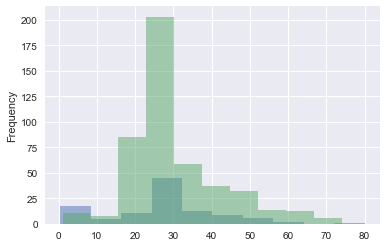

In [182]:
#survived x Age
%matplotlib inline

import matplotlib.pyplot as plt


survived_age_df = train_df.loc[(train_df['Survived'] == 1)].Age
survived_age_df

age_males_survived = train_df[(train_df['Sex'] == 'male') & (train_df['Survived'] == 1)].Age
age_males_not_survived = train_df[(train_df['Sex'] == 'male') & (train_df['Survived'] == 0)].Age

plt.figure();

age_males_survived.plot(kind='hist', alpha=0.5)
age_males_not_survived.plot(kind='hist', alpha=0.5)






# males_not_survived = train_df[(train_df['Sex'] == 'male') & (train_df['Survived'] == 0)]



In [90]:
#survived x Parch
mean_survived_column(unique_parch, 'Parch')

0 0.343657817109
1 0.550847457627
2 0.5
5 0.2
3 0.6
4 0.0
6 0.0


In [87]:
#survived x SibSp
mean_survived_column(unique_sibsp, 'SibSp')

1 0.535885167464
0 0.345394736842
3 0.25
4 0.166666666667
2 0.464285714286
5 0.0
8 0.0


In [89]:
#survived x Embarked
mean_survived_column(unique_embarked, 'Embarked')

S 0.336956521739
C 0.553571428571
Q 0.38961038961
nan nan


### 4. Conclusions

### 5. Communicate